# Linear regression

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
plt.rcParams['figure.figsize'] = (10,10)

# Loading Boston house prices dataset

In [2]:
from sklearn.datasets import load_boston

In [5]:
boston_dataset = load_boston()

In [9]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [8]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
boston['MEDV'] = boston_dataset.target

In [11]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Loading as X, y

In [4]:
X, y = load_boston(return_X_y=True)

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

boston.isnull().sum()

## Null values

## Variable correlation

 By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).

## Feature selection

An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features DIS and AGE which have a correlation of -0.75.

In [23]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
 variance_inflation_factor(exog=X, exog_idx=0)

2.0974663048400424

In [43]:
data['MEDV'] = boston['MEDV']

In [60]:
data

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,6.575,65.2,4.0900,1.0,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,6.421,78.9,4.9671,2.0,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,7.185,61.1,4.9671,2.0,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,6.998,45.8,6.0622,3.0,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,7.147,54.2,6.0622,3.0,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,6.593,69.1,2.4786,1.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,6.120,76.7,2.2875,1.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,6.976,91.0,2.1675,1.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,6.794,89.3,2.3889,1.0,393.45,6.48,22.0


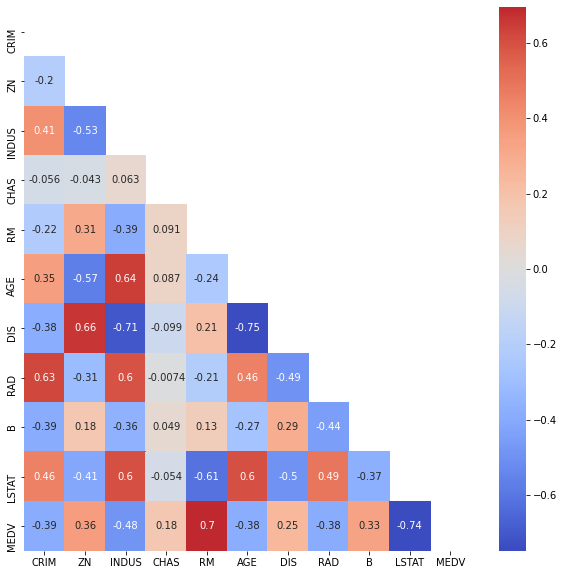

In [44]:
sns.heatmap(data=data.corr(), annot=True, cmap='coolwarm',center = 0, mask=np.triu(data.corr()))

In [61]:
X = data.drop('MEDV', axis=1).values

## Model

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()


LinearRegression()

In [64]:
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.700712852707657

In [65]:
model.score(X_test, y_test)

0.6876954517414959

In [66]:
y_pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
rmse

5.070431343803204

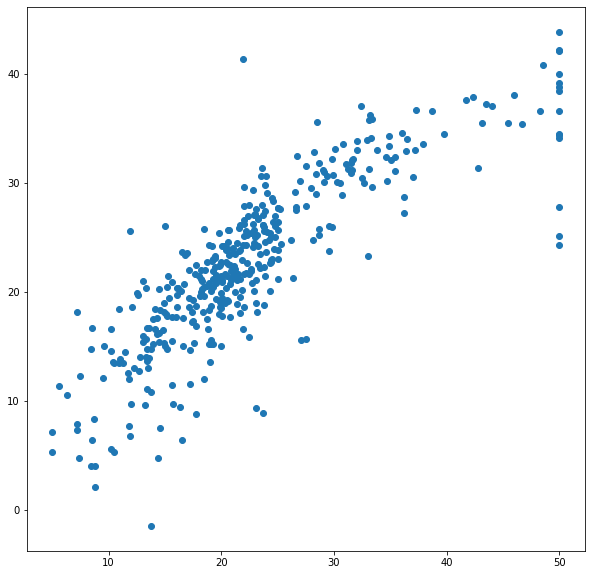

In [67]:
plt.scatter(x=y_test, y=y_pred)